# Team Project - Anomaly Detection

In [1]:
# Libraries
import pandas as pd
import numpy as np

# Wrangling
import acquire as a
import prepare as p

# Exploration/Visualizing
import matplotlib.pyplot as plt
import seaborn as sns
import explore as e
from IPython.core import display as ICD

from env import get_db_url


## Acquire
- Will acquire a dataset to use in answering our questions by doing the following.
    - Acquire a dataset from a SQL server database 
    - Save it locally as a .csv file
    - Convert the .csv file as a dataframe using Pandas

In [2]:
# returns a dataframe after acquiring curriculum log data from SQL database
df = a.get_log_data()

In [3]:
# returns information on number of non-nulls for each column and their datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  900223 non-null  int64  
 1   date        900223 non-null  object 
 2   time        900223 non-null  object 
 3   path        900222 non-null  object 
 4   user_id     900223 non-null  int64  
 5   cohort_id   847330 non-null  float64
 6   ip          900223 non-null  object 
 7   id          847330 non-null  float64
 8   name        847330 non-null  object 
 9   slack       847330 non-null  object 
 10  start_date  847330 non-null  object 
 11  end_date    847330 non-null  object 
 12  created_at  847330 non-null  object 
 13  updated_at  847330 non-null  object 
 14  deleted_at  0 non-null       float64
 15  program_id  847330 non-null  float64
dtypes: float64(4), int64(2), object(10)
memory usage: 109.9+ MB


In [4]:
# returns total number of sums for each column
df.isna().sum()

Unnamed: 0         0
date               0
time               0
path               1
user_id            0
cohort_id      52893
ip                 0
id             52893
name           52893
slack          52893
start_date     52893
end_date       52893
created_at     52893
updated_at     52893
deleted_at    900223
program_id     52893
dtype: int64

- Total rows = 900223
- Deleted_at = 100% nulls
- Most columns have 52,893 nulls

## Prepare
 - Will prepare the dataframe to best answer the question in Explore section by doing the following
     - Dropping all rows with nulls
     - Dropping unnecessary columns
     - Converting columns to useful datatypes
     - Renaming columns for clarity

In [5]:
# shows preview the top of the dataframe
df.head(3)

,Unnamed: 0,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
1,1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2,2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0


In [6]:
# drops all rows with nulls; drops the columns 'slack', 'id', and 'deleted_at'
# ; concatenates 'date' and 'time' columns to single 'date_time' column; 
# renames values in program_id column from integers to string names; converts 
# 'start_date', 'end_date', 'created_at', 'updated_at', and 'date_time' from 
# object to datetime format; renames 'name' and 'program_id' columns to 
# 'cohort' and 'programs' respectively
q2_df = p.q2_df_prep(df)

In [7]:
# returns information on number of non-nulls for each column and their datatype
q2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763298 entries, 0 to 900217
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   path        763298 non-null  object        
 1   user_id     763298 non-null  int64         
 2   cohort_id   763298 non-null  float64       
 3   ip          763298 non-null  object        
 4   cohort      763298 non-null  object        
 5   start_date  763298 non-null  datetime64[ns]
 6   end_date    763298 non-null  datetime64[ns]
 7   created_at  763298 non-null  datetime64[ns]
 8   updated_at  763298 non-null  datetime64[ns]
 9   programs    763298 non-null  object        
 10  date_time   763298 non-null  datetime64[ns]
dtypes: datetime64[ns](5), float64(1), int64(1), object(4)
memory usage: 69.9+ MB


In [8]:
# shows preview the top of the dataframe
q2_df.head()

,path,user_id,cohort_id,ip,cohort,start_date,end_date,created_at,updated_at,programs,date_time
0,/,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:55:03
1,java-ii,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:02
2,java-ii/object-oriented-programming,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:05
3,slides/object_oriented_programming,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:06
4,javascript-i/conditionals,2,22.0,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:24


## Exploration
- Question 2: Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [9]:
# Returns a dataframe with entries that fall within the start and end dates for their respective cohort
q2_df = q2_df[(q2_df['date_time'] >= q2_df['start_date']) & (q2_df['date_time'] <= q2_df['end_date'])]
q2_df.head(3)

,path,user_id,cohort_id,ip,cohort,start_date,end_date,created_at,updated_at,programs,date_time
4,javascript-i/conditionals,2,22.0,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:24
5,javascript-i/loops,2,22.0,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:41
6,javascript-i/conditionals,3,22.0,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:46


In [10]:
# overall row counts by cohort
q2_df['cohort'].value_counts()

jupiter       36447
ceres         35766
zion          33842
fortuna       33397
voyageurs     32337
ganymede      29438
darden        28834
apex          28641
hyperion      28513
betelgeuse    25936
europa        25702
teddy         25280
deimos        24799
ulysses       24088
wrangell      24059
kalypso       23691
xanadu        22508
bayes         21813
andromeda     21114
yosemite      19255
curie         17943
luna          16623
marco         16397
bash          16371
easley        14715
florence       8562
neptune        7276
sequoia        2178
oberon         1672
Name: cohort, dtype: int64

In [11]:
q2_df['programs'].unique().tolist()  

['full_stack_java', 'data_science']

Dataframe abbreviations:
- q2_fsp = full_stack_php
- q2_fsj = full_stack_java
- q2_ds = data_science
- q2_fep = front_end_programming

In [12]:
# full stack php dataframe
q2_fsp = q2_df[q2_df.programs == 'full_stack_php']
q2_fsp.head(3)

,path,user_id,cohort_id,ip,cohort,start_date,end_date,created_at,updated_at,programs,date_time


In [13]:
# full stack java dataframe
q2_fsj  = q2_df[q2_df.programs == 'full_stack_java']
q2_fsj.head(3)

,path,user_id,cohort_id,ip,cohort,start_date,end_date,created_at,updated_at,programs,date_time
4,javascript-i/conditionals,2,22.0,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:24
5,javascript-i/loops,2,22.0,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:41
6,javascript-i/conditionals,3,22.0,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:46


In [14]:
# data science dataframe
q2_ds = q2_df[q2_df.programs == 'data_science']
q2_ds.head(3)

,path,user_id,cohort_id,ip,cohort,start_date,end_date,created_at,updated_at,programs,date_time
326053,/,466,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-20 09:39:58
326054,/,467,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-20 09:39:59
326055,/,468,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-20 09:39:59


In [15]:
# front end programming dataframe
q2_fep = q2_df[q2_df.programs == 'front_end_programming']
q2_fep.head(3)

,path,user_id,cohort_id,ip,cohort,start_date,end_date,created_at,updated_at,programs,date_time


In [16]:
# row counts for full stack php
q2_fsp['cohort'].value_counts()

Series([], Name: cohort, dtype: int64)

In [17]:
# row counts for full stack java
q2_fsj['cohort'].value_counts()

jupiter       36447
ceres         35766
zion          33842
fortuna       33397
voyageurs     32337
ganymede      29438
apex          28641
hyperion      28513
betelgeuse    25936
europa        25702
teddy         25280
deimos        24799
ulysses       24088
wrangell      24059
kalypso       23691
xanadu        22508
andromeda     21114
yosemite      19255
luna          16623
marco         16397
bash          16371
neptune        7276
sequoia        2178
oberon         1672
Name: cohort, dtype: int64

In [18]:
# row counts for data science
q2_ds['cohort'].value_counts()

darden      28834
bayes       21813
curie       17943
easley      14715
florence     8562
Name: cohort, dtype: int64

In [19]:
# Row counts for front end programming
q2_fep['cohort'].value_counts()

Series([], Name: cohort, dtype: int64)

Quick takeaways
- After removing rows whose "date_time" entry didn't fall within the associated "start_date" & "end_date" for the class, it resulted in the the Full Stack PHP and Front End Programming to return empty dataframes after the original dataframe was divided up by program.
- This indicates that all entries for those programs were either before or after their associated class dates
- The Full Stack Java and Data Science programs are the two remaining dataframes that will be use

In [20]:
q2_fsj.head(3)

,path,user_id,cohort_id,ip,cohort,start_date,end_date,created_at,updated_at,programs,date_time
4,javascript-i/conditionals,2,22.0,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:24
5,javascript-i/loops,2,22.0,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:41
6,javascript-i/conditionals,3,22.0,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:46


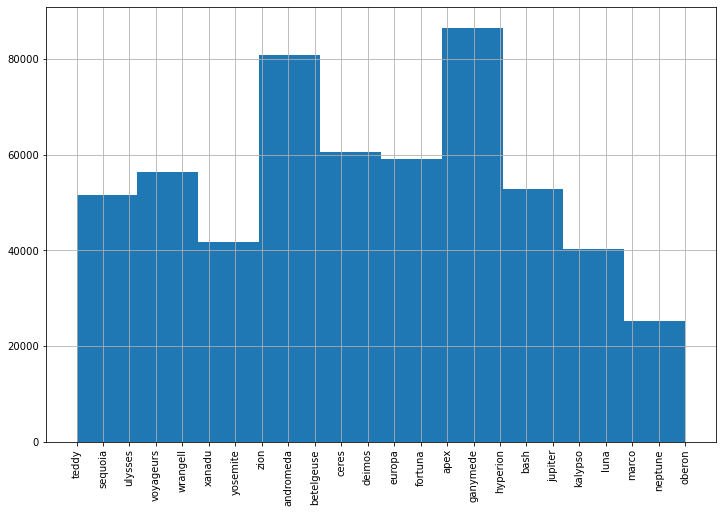

In [21]:
# Plots histogram of number of entries for all Full Stack Java cohorts
plt.figure(figsize=(12,8))
q2_fsj['cohort'].hist()
plt.xticks(rotation = 90)
plt.show()

In [22]:
# Shows the number of entries for each unique value in the 'path' column for the Full Stack Java Program
q2_fsj_path_counts = q2_fsj['path'].value_counts().to_frame()
q2_fsj_path_counts

,path
/,23374
toc,15006
javascript-i,13224
search/search_index.json,11641
java-iii,9621
...,...
extra-features/file-upload,1
4.3_control_structures,1
4.6.4_introduction_to_seaborn,1
3.1-mysql-introduction,1


In [23]:
# Shows a preview of the top of the Data Science program dataframe
q2_ds.head(3)

,path,user_id,cohort_id,ip,cohort,start_date,end_date,created_at,updated_at,programs,date_time
326053,/,466,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-20 09:39:58
326054,/,467,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-20 09:39:59
326055,/,468,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-20 09:39:59


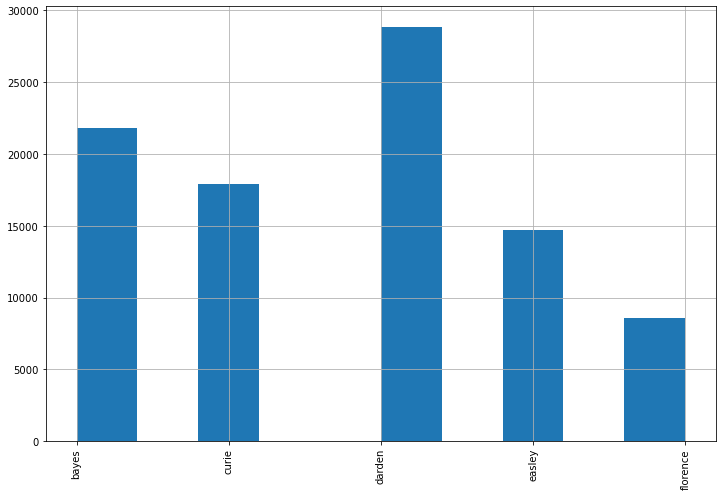

In [24]:
# Plots histogram of number of entries for all Full Stack Java cohorts
plt.figure(figsize=(12,8))
q2_ds['cohort'].hist()
plt.xticks(rotation = 90)
plt.show()

In [25]:
# Assigns a variable to the list of fsj lessons
q2_fsj_lessons = ['javascript-i', 'java-iii', 'html-css', 'java-ii', 'jquery', 
                  'mysql', 'spring', 'slides', 'web-design'] 

In [26]:
# Shows the number of entries for each unique value in the 'path' column for the Data Science Program
q2_ds_path_counts = q2_ds['path'].value_counts().to_frame()
q2_ds_path_counts

,path
/,6912
search/search_index.json,1710
1-fundamentals/modern-data-scientist.jpg,1527
1-fundamentals/AI-ML-DL-timeline.jpg,1524
classification/overview,1518
...,...
cli/4-navigating-the-filesystem,1
spring/extra-features/error-pages/asdfasdf,1
5-detecting-with-clustering,1
End_to_End_clustering,1


In [27]:
# Assigns a variable to the list of ds lessons
q2_ds_lessons = ['fundamentals', 'classification', 'sql', 'regression', 'anomaly-detection', 
             'python', 'stats', 'clustering', 'storytelling', 'timeseries', 'nlp', 
             'distributed-ml', 'advanced-topics']

In [28]:
# filtering the rows where that contain 'fundamentals'
q2_ds_fundamentals = q2_ds[q2_ds['path'].str.contains('fundamentals')]
q2_ds_fundamentals.head(3)

,path,user_id,cohort_id,ip,cohort,start_date,end_date,created_at,updated_at,programs,date_time
326077,1-fundamentals/1.1-intro-to-data-science,469,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-20 09:41:02
326078,1-fundamentals/modern-data-scientist.jpg,469,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-20 09:41:02
326079,1-fundamentals/AI-ML-DL-timeline.jpg,469,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-20 09:41:02


In [29]:
# filtering the rows where that contain 'classification'
q2_ds_classification = q2_ds[q2_ds['path'].str.contains('classification')]
q2_ds_classification.head(3)

,path,user_id,cohort_id,ip,cohort,start_date,end_date,created_at,updated_at,programs,date_time
327885,7-classification/1-overview,467,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-21 13:36:31
327890,7-classification/2-intro-to-classification,467,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-21 13:37:15
327891,7-classification/3-acquire,467,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-21 13:37:19


In [30]:
# filtering the rows where that contain 'sql'
q2_ds_sql = q2_ds[q2_ds['path'].str.contains('sql')]
q2_ds_sql.head(3)

,path,user_id,cohort_id,ip,cohort,start_date,end_date,created_at,updated_at,programs,date_time
326064,3-sql/1-mysql-overview,470,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-20 09:40:28
330839,3-sql/2-mysql-introduction,470,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-23 16:39:13
331082,3-sql/1-mysql-overview,470,34.0,66.69.81.250,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-24 20:49:11


In [31]:
# filtering the rows where that contain 'regression'
q2_ds_regression = q2_ds[q2_ds['path'].str.contains('regression')]
q2_ds_regression.head(3)

,path,user_id,cohort_id,ip,cohort,start_date,end_date,created_at,updated_at,programs,date_time
327851,6-regression/1-overview,467,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-21 13:35:37
327852,6-regression/1-overview,479,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-21 13:35:44
327853,6-regression/1-overview,481,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-21 13:35:45


In [32]:
# filtering the rows where that contain 'anomaly-detection'
q2_ds_anomaly_detection = q2_ds[q2_ds['path'].str.contains('anomaly-detection')]
q2_ds_anomaly_detection.head(3)

,path,user_id,cohort_id,ip,cohort,start_date,end_date,created_at,updated_at,programs,date_time
327856,10-anomaly-detection/1-overview,481,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-21 13:35:51
327857,10-anomaly-detection/AnomalyDetectionCartoon.jpeg,481,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-21 13:35:51
327864,10-anomaly-detection/1-overview,483,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-21 13:35:59


In [33]:
# filtering the rows where that contain 'python'
q2_ds_python = q2_ds[q2_ds['path'].str.contains('python')]
q2_ds_python.head(3)

,path,user_id,cohort_id,ip,cohort,start_date,end_date,created_at,updated_at,programs,date_time
333836,4-python/project,472,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-27 14:16:47
333857,4-python/6-imports,472,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-27 14:18:50
334501,4-python/project,470,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-28 09:06:29


In [34]:
# filtering the rows where that contain 'stats'
q2_ds_stats = q2_ds[q2_ds['path'].str.contains('stats')]
q2_ds_stats.head(3)

,path,user_id,cohort_id,ip,cohort,start_date,end_date,created_at,updated_at,programs,date_time
327912,5-stats/1-overview,483,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-21 13:38:24
327913,5-stats/1-overview,483,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-21 13:40:02
334819,5-stats/4.2-compare-means,469,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-28 11:10:50


In [35]:
# filtering the rows where that contain 'clustering'
q2_ds_clustering = q2_ds[q2_ds['path'].str.contains('clustering')]
q2_ds_clustering.head(3)

,path,user_id,cohort_id,ip,cohort,start_date,end_date,created_at,updated_at,programs,date_time
327900,8-clustering/1-overview,467,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-21 13:37:30
327901,8-clustering/2-about,467,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-21 13:37:36
327902,8-clustering/Hospital-Distance-Clusters.jpg,467,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-21 13:37:37


In [36]:
# filtering the rows where that contain 'storytelling'
q2_ds_storytelling = q2_ds[q2_ds['path'].str.contains('storytelling')]
q2_ds_storytelling.head(3)

,path,user_id,cohort_id,ip,cohort,start_date,end_date,created_at,updated_at,programs,date_time
326067,2-storytelling/bad-charts,467,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-20 09:40:30
326068,2-storytelling/misleading1_baseball.jpg,467,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-20 09:40:30
326069,2-storytelling/misleading1_fox.jpg,467,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-20 09:40:30


In [37]:
# filtering the rows where that contain 'timeseries'
q2_ds_timeseries = q2_ds[q2_ds['path'].str.contains('timeseries')]
q2_ds_timeseries.head(3)

,path,user_id,cohort_id,ip,cohort,start_date,end_date,created_at,updated_at,programs,date_time
327909,9-timeseries/1-overview,467,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-21 13:38:00
327910,9-timeseries/project,467,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-21 13:38:01
327940,9-timeseries/1-overview,467,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-21 13:54:54


In [38]:
# filtering the rows where that contain 'nlp'
q2_ds_nlp = q2_ds[q2_ds['path'].str.contains('nlp')]
q2_ds_nlp.head(3)

,path,user_id,cohort_id,ip,cohort,start_date,end_date,created_at,updated_at,programs,date_time
327867,11-nlp/1-overview,471,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-21 13:36:05
327881,11-nlp/1-overview,483,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-21 13:36:28
328890,11-nlp/1-overview,473,34.0,208.54.86.133,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-22 08:23:05


In [39]:
# filtering the rows where that contain 'distributed-ml'
q2_ds_distributed_ml = q2_ds[q2_ds['path'].str.contains('distributed-ml')]
q2_ds_distributed_ml.head(3)

,path,user_id,cohort_id,ip,cohort,start_date,end_date,created_at,updated_at,programs,date_time
353721,12-distributed-ml/topic-modeling,484,34.0,70.117.31.136,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-09-22 22:18:55
353878,12-distributed-ml/1-overview,484,34.0,70.117.31.136,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-09-23 00:38:58
353879,12-distributed-ml/2-environment-setup,484,34.0,70.117.31.136,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-09-23 00:39:36


In [40]:
# filtering the rows where that contain 'advanced-topics'
q2_ds_advanced_topics = q2_ds[q2_ds['path'].str.contains('advanced-topics')]
q2_ds_advanced_topics.head(3)

,path,user_id,cohort_id,ip,cohort,start_date,end_date,created_at,updated_at,programs,date_time
326609,13-advanced-topics/3.7-styling-webpages,478,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-20 12:27:11
326610,13-advanced-topics/3.7-styling-webpages,478,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-20 12:27:16
351300,13-advanced-topics/3.1-developing-data-products,474,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-09-18 11:26:50


In [41]:
# Returns the number of rows for the respective dataframs of the different programs
q2_fsp_rows = q2_fsp.shape[0]
print(f'The q2_fsp dataframe has {q2_fsp_rows} rows.')

q2_fsj_rows = q2_fsj.shape[0]
print(f'The q2_fsj dataframe has {q2_fsj_rows} rows.')

q2_ds_rows = q2_ds.shape[0]
print(f'The q2_ds dataframe has {q2_ds_rows} rows.')

q2_fep_rows = q2_fep.shape[0]
print(f'The q2_fep dataframe has {q2_fep_rows} rows.')

The q2_fsp dataframe has 0 rows.
The q2_fsj dataframe has 555330 rows.
The q2_ds dataframe has 91867 rows.
The q2_fep dataframe has 0 rows.


In [42]:
# Returns the number of entries for each of the Full Script Java cohorts
q2_fsj['cohort'].value_counts()

jupiter       36447
ceres         35766
zion          33842
fortuna       33397
voyageurs     32337
ganymede      29438
apex          28641
hyperion      28513
betelgeuse    25936
europa        25702
teddy         25280
deimos        24799
ulysses       24088
wrangell      24059
kalypso       23691
xanadu        22508
andromeda     21114
yosemite      19255
luna          16623
marco         16397
bash          16371
neptune        7276
sequoia        2178
oberon         1672
Name: cohort, dtype: int64

In [43]:
# Returns the number of entries for each of the Data Science cohorts
q2_ds['cohort'].value_counts()

darden      28834
bayes       21813
curie       17943
easley      14715
florence     8562
Name: cohort, dtype: int64

In [44]:
# df of values in 'path' column that contain 'javascript-i'
q2_fsj_javascript_i = q2_fsj[q2_fsj['path'].str.contains('javascript-i')]
q2_fsj_javascript_i.head(3)

,path,user_id,cohort_id,ip,cohort,start_date,end_date,created_at,updated_at,programs,date_time
4,javascript-i/conditionals,2,22.0,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:24
5,javascript-i/loops,2,22.0,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:41
6,javascript-i/conditionals,3,22.0,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:46


In [45]:
# df of values in 'path' column that contain 'java-iii'
q2_fsj_java_iii = q2_fsj[q2_fsj['path'].str.contains('java-iii')]
q2_fsj_java_iii.head(3)

,path,user_id,cohort_id,ip,cohort,start_date,end_date,created_at,updated_at,programs,date_time
780,java-iii/passwords,52,21.0,99.203.26.41,sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,full_stack_java,2018-01-27 22:43:09
861,java-iii,45,21.0,104.193.225.250,sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,full_stack_java,2018-01-28 14:30:41
865,java-iii,42,21.0,70.114.139.150,sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,full_stack_java,2018-01-28 15:06:00


In [46]:
# df of values in 'path' column that contain 'html-css'
q2_fsj_html_css = q2_fsj[q2_fsj['path'].str.contains('html-css')]
q2_fsj_html_css.head(3)

,path,user_id,cohort_id,ip,cohort,start_date,end_date,created_at,updated_at,programs,date_time
78,html-css/introduction,22,21.0,97.105.19.61,sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,full_stack_java,2018-01-26 11:11:52
155,html-css,35,22.0,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 11:49:37
193,html-css,27,21.0,97.105.19.61,sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,full_stack_java,2018-01-26 12:28:01


In [47]:
# df of values in 'path' column that contain 'java-ii'
q2_fsj_java_ii = q2_fsj[q2_fsj['path'].str.contains('java-ii')]
q2_fsj_java_ii.head(3)

,path,user_id,cohort_id,ip,cohort,start_date,end_date,created_at,updated_at,programs,date_time
780,java-iii/passwords,52,21.0,99.203.26.41,sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,full_stack_java,2018-01-27 22:43:09
861,java-iii,45,21.0,104.193.225.250,sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,full_stack_java,2018-01-28 14:30:41
865,java-iii,42,21.0,70.114.139.150,sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,full_stack_java,2018-01-28 15:06:00


In [48]:
# df of values in 'path' column that contain 'jquery'
q2_fsj_jquery = q2_fsj[q2_fsj['path'].str.contains('jquery')]
q2_fsj_jquery.head(3)

,path,user_id,cohort_id,ip,cohort,start_date,end_date,created_at,updated_at,programs,date_time
220,jquery/personal-site,31,22.0,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 13:37:07
522,jquery,19,22.0,96.8.150.23,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 21:18:43
523,jquery/selectors,19,22.0,96.8.150.23,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 21:18:45


In [49]:
# df of values in 'path' column that contain 'mysql'
q2_fsj_mysql = q2_fsj[q2_fsj['path'].str.contains('mysql')]
q2_fsj_mysql.head(3)

,path,user_id,cohort_id,ip,cohort,start_date,end_date,created_at,updated_at,programs,date_time
149,mysql,16,21.0,97.105.19.61,sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,full_stack_java,2018-01-26 11:48:17
234,mysql,36,21.0,97.105.19.61,sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,full_stack_java,2018-01-26 13:51:13
235,mysql/users,36,21.0,97.105.19.61,sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,full_stack_java,2018-01-26 13:51:15


In [50]:
# df of values in 'path' column that contain 'spring'
q2_fsj_spring = q2_fsj[q2_fsj['path'].str.contains('spring')]
q2_fsj_spring.head(3)

,path,user_id,cohort_id,ip,cohort,start_date,end_date,created_at,updated_at,programs,date_time
40,spring,10,21.0,97.105.19.61,sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,full_stack_java,2018-01-26 10:18:24
51,spring,16,21.0,97.105.19.61,sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,full_stack_java,2018-01-26 10:35:29
53,spring/extra-features/file-upload,16,21.0,97.105.19.61,sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,full_stack_java,2018-01-26 10:35:33


In [51]:
# df of values in 'path' column that contain 'slides'
q2_fsj_slides = q2_fsj[q2_fsj['path'].str.contains('slides')]
q2_fsj_slides.head(3)

,path,user_id,cohort_id,ip,cohort,start_date,end_date,created_at,updated_at,programs,date_time
781,slides/passwords,52,21.0,99.203.26.41,sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,full_stack_java,2018-01-27 22:43:12
1059,slides/user_input,55,21.0,97.105.19.61,sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,full_stack_java,2018-01-29 09:25:47
1093,slides/deployment_and_dependencies,41,21.0,97.105.19.61,sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,full_stack_java,2018-01-29 09:35:13


In [52]:
# df of values in 'path' column that contain 'web-design'
q2_fsj_web_design = q2_fsj[q2_fsj['path'].str.contains('web-design')]
q2_fsj_web_design.head(3)

,path,user_id,cohort_id,ip,cohort,start_date,end_date,created_at,updated_at,programs,date_time
294126,web-design,412,32.0,97.105.19.58,betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,full_stack_java,2019-07-08 15:14:00
294132,web-design,420,32.0,97.105.19.58,betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,full_stack_java,2019-07-08 15:14:05
294135,web-design/intro,420,32.0,97.105.19.58,betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,full_stack_java,2019-07-08 15:14:20


In [53]:
# list of names of ds lesson dfs
q2_ds_lesson_dfs = [q2_ds_fundamentals, q2_ds_classification, q2_ds_sql,
                    q2_ds_regression, q2_ds_anomaly_detection, q2_ds_python,
                    q2_ds_stats, q2_ds_clustering, q2_ds_storytelling, 
                    q2_ds_timeseries, q2_ds_nlp, q2_ds_distributed_ml, 
                    q2_ds_advanced_topics]

In [54]:
# list of names of fsj lesson dfs
q2_fsj_lesson_dfs = [q2_fsj_javascript_i, q2_fsj_java_iii, q2_fsj_html_css
                     , q2_fsj_java_ii, q2_fsj_jquery, q2_fsj_mysql, 
                     q2_fsj_spring, q2_fsj_slides, q2_fsj_web_design]

Groupby for Data Science

In [55]:
# groups the 'cohort' column by the number of corresponding values in the 
# 'path' column in descending order
q2_ds_fundamentals_groupby = q2_ds_fundamentals.groupby('cohort')['path'].count()
q2_ds_fundamentals_groupby

cohort
bayes       2715
curie       2092
darden      4182
easley      2545
florence    3637
Name: path, dtype: int64

In [56]:
# assigns name to series
q2_ds_fundamentals_groupby.name = 'fundamentals'

In [57]:
# groups the 'cohort' column by the number of corresponding values in the 
# 'path' column in descending order
q2_ds_classification_groupby = q2_ds_classification.groupby('cohort')['path'].count()
q2_ds_classification_groupby

cohort
bayes       1711
curie       1169
darden      4715
easley      2716
florence     214
Name: path, dtype: int64

In [58]:
# assigns name to series
q2_ds_classification_groupby.name = 'classification'

In [59]:
# groups the 'cohort' column by the number of corresponding values in the 
# 'path' column in descending order
q2_ds_sql_groupby = q2_ds_sql.groupby('cohort')['path'].count()
q2_ds_sql_groupby

cohort
bayes       1951
curie       2356
darden      3665
easley      1872
florence    2282
Name: path, dtype: int64

In [60]:
# assigns name to series
q2_ds_sql_groupby.name = 'sql'

In [61]:
# groups the 'cohort' column by the number of corresponding values in the 
# 'path' column in descending order
q2_ds_regression_groupby = q2_ds_regression.groupby('cohort')['path'].count()
q2_ds_regression_groupby

cohort
bayes       2416
curie       2118
darden      1898
easley      1261
florence      22
Name: path, dtype: int64

In [62]:
# assigns name to series
q2_ds_regression_groupby.name = 'regression'

In [63]:
# groups the 'cohort' column by the number of corresponding values in the 
# 'path' column in descending order
q2_ds_anomaly_detection_groupby = q2_ds_anomaly_detection.groupby('cohort')['path'].count()
q2_ds_anomaly_detection_groupby

cohort
bayes       1068
curie        884
darden      1460
easley       255
florence      37
Name: path, dtype: int64

In [64]:
# assigns name to series
q2_ds_anomaly_detection_groupby.name = 'anomaly_detection'

In [65]:
# groups the 'cohort' column by the number of corresponding values in the 
# 'path' column in descending order
q2_ds_python_groupby = q2_ds_python.groupby('cohort')['path'].count()
q2_ds_python_groupby

cohort
bayes       2220
curie       2286
darden      2500
easley      1276
florence    1365
Name: path, dtype: int64

In [66]:
# assigns name to series
q2_ds_python_groupby.name = 'python'

In [67]:
# groups the 'cohort' column by the number of corresponding values in the 
# 'path' column in descending order
q2_ds_stats_groupby = q2_ds_stats.groupby('cohort')['path'].count()
q2_ds_stats_groupby

cohort
bayes       1783
curie       1214
darden      2126
easley      1008
florence       5
Name: path, dtype: int64

In [68]:
# assigns name to series
q2_ds_stats_groupby.name = 'stats'

In [69]:
# groups the 'cohort' column by the number of corresponding values in the 
# 'path' column in descending order
q2_ds_clustering_groupby = q2_ds_clustering.groupby('cohort')['path'].count()
q2_ds_clustering_groupby

cohort
bayes       1254
curie        782
darden      1173
easley       862
florence      10
Name: path, dtype: int64

In [70]:
# assigns name to series
q2_ds_clustering_groupby.name = 'clustering'

In [71]:
# groups the 'cohort' column by the number of corresponding values in the 
# 'path' column in descending order
q2_ds_storytelling_groupby = q2_ds_storytelling.groupby('cohort')['path'].count()
q2_ds_storytelling_groupby

cohort
bayes       775
curie       683
darden      904
easley      744
florence     16
Name: path, dtype: int64

In [72]:
# assigns name to series
q2_ds_storytelling_groupby.name = 'storytelling'

In [73]:
# groups the 'cohort' column by the number of corresponding values in the 
# 'path' column in descending order
q2_ds_timeseries_groupby = q2_ds_timeseries.groupby('cohort')['path'].count()
q2_ds_timeseries_groupby

cohort
bayes       1117
curie        622
darden       939
easley       438
florence       6
Name: path, dtype: int64

In [74]:
# assigns name to series
q2_ds_timeseries_groupby.name = 'timeseries'

In [75]:
# groups the 'cohort' column by the number of corresponding values in the 
# 'path' column in descending order
q2_ds_nlp_groupby = q2_ds_nlp.groupby('cohort')['path'].count()
q2_ds_nlp_groupby

cohort
bayes       981
curie       723
darden      979
easley       34
florence      4
Name: path, dtype: int64

In [76]:
# assigns name to series
q2_ds_nlp_groupby.name = 'nlp'

In [77]:
# groups the 'cohort' column by the number of corresponding values in the 
# 'path' column in descending order
q2_ds_distributed_ml_groupby = q2_ds_distributed_ml.groupby('cohort')['path'].count()
q2_ds_distributed_ml_groupby

cohort
bayes       493
curie       374
darden      545
easley        8
florence      4
Name: path, dtype: int64

In [78]:
# assigns name to series
q2_ds_distributed_ml_groupby.name = 'distributed_ml'

In [79]:
# groups the 'cohort' column by the number of corresponding values in the 
# 'path' column in descending order
q2_ds_advanced_topics_groupby = q2_ds_advanced_topics.groupby('cohort')['path'].count()
q2_ds_advanced_topics_groupby

cohort
bayes       541
curie       397
darden      128
easley       26
florence      1
Name: path, dtype: int64

In [80]:
# assigns name to series
q2_ds_advanced_topics_groupby.name = 'advanced_topics'

Groupby for Full Stack Java

In [81]:
# groups the 'cohort' column by the number of corresponding values in the 
# 'path' column in descending order
q2_fsj_javascript_i_groupby = q2_fsj_javascript_i.groupby('cohort')['path'].count()
q2_fsj_javascript_i_groupby

cohort
andromeda     4833
apex          5449
bash          3443
betelgeuse    6555
ceres         7989
deimos        4846
europa        4816
fortuna       6587
ganymede      5801
hyperion      6423
jupiter       6653
kalypso       5191
luna          4501
marco         6589
neptune       2952
oberon        1334
sequoia         77
teddy         5468
ulysses       5116
voyageurs     6582
wrangell      5730
xanadu        4942
yosemite      4510
zion          7617
Name: path, dtype: int64

In [82]:
# assigns name to series
q2_fsj_javascript_i_groupby.name = 'javascript_i'

In [83]:
# groups the 'cohort' column by the number of corresponding values in the 
# 'path' column in descending order
q2_fsj_java_iii_groupby = q2_fsj_java_iii.groupby('cohort')['path'].count()
q2_fsj_java_iii_groupby

cohort
andromeda     1612
apex          2328
bash          1251
betelgeuse    1911
ceres         2496
deimos        2074
europa        1934
fortuna       2677
ganymede      2425
hyperion      2402
jupiter       3590
kalypso       2043
luna          1466
marco           76
neptune         14
oberon           3
sequoia         46
teddy         2344
ulysses       1644
voyageurs     2927
wrangell      1679
xanadu        2036
yosemite      1545
zion          2571
Name: path, dtype: int64

In [84]:
# assigns name to series
q2_fsj_java_iii_groupby.name = 'fsj_java_iii'

In [85]:
# groups the 'cohort' column by the number of corresponding values in the 
# 'path' column in descending order
q2_fsj_html_css_groupby = q2_fsj_html_css.groupby('cohort')['path'].count()
q2_fsj_html_css_groupby

cohort
andromeda     2686
apex          3428
bash          1734
betelgeuse    3141
ceres         5577
deimos        3748
europa        3781
fortuna       3901
ganymede      3410
hyperion      3479
jupiter       3688
kalypso       2961
luna          2101
marco         3396
neptune       2501
oberon          22
sequoia        159
teddy          548
ulysses       2740
voyageurs     3152
wrangell      3040
xanadu        2597
yosemite      2179
zion          3472
Name: path, dtype: int64

In [86]:
# assigns name to series
q2_fsj_html_css_groupby.name = 'html_css'

In [87]:
# groups the 'cohort' column by the number of corresponding values in the 
# 'path' column in descending order
q2_fsj_java_ii_groupby = q2_fsj_java_ii.groupby('cohort')['path'].count()
q2_fsj_java_ii_groupby

cohort
andromeda     3109
apex          4851
bash          2423
betelgeuse    4111
ceres         5429
deimos        4113
europa        3949
fortuna       5391
ganymede      5077
hyperion      4774
jupiter       7046
kalypso       3940
luna          2813
marco          153
neptune         25
oberon           4
sequoia         69
teddy         3991
ulysses       3404
voyageurs     5570
wrangell      3210
xanadu        3604
yosemite      2788
zion          5216
Name: path, dtype: int64

In [88]:
# assigns name to series
q2_fsj_java_ii_groupby.name = 'java_ii'

In [89]:
# groups the 'cohort' column by the number of corresponding values in the 
# 'path' column in descending order
q2_fsj_jquery_groupby = q2_fsj_jquery.groupby('cohort')['path'].count()
q2_fsj_jquery_groupby

cohort
andromeda     1975
apex          2249
bash          1339
betelgeuse    2882
ceres         3355
deimos        1953
europa        2312
fortuna       2684
ganymede      2348
hyperion      2208
jupiter       2453
kalypso       2269
luna          1797
marco         2499
neptune         58
oberon           5
sequoia         49
teddy         2023
ulysses       2257
voyageurs     2678
wrangell      2327
xanadu        2051
yosemite      1451
zion          3277
Name: path, dtype: int64

In [90]:
# assigns name to series
q2_fsj_jquery_groupby.name = 'jquery'

In [91]:
# groups the 'cohort' column by the number of corresponding values in the 
# 'path' column in descending order
q2_fsj_mysql_groupby = q2_fsj_mysql.groupby('cohort')['path'].count()
q2_fsj_mysql_groupby

cohort
andromeda     2650
apex          3446
bash          1941
betelgeuse    2747
ceres         3871
deimos        3620
europa        3441
fortuna       4246
ganymede      3598
hyperion      2969
jupiter       4296
kalypso       2440
luna          2029
marco          118
neptune         29
sequoia        217
teddy         3956
ulysses       2844
voyageurs     4338
wrangell      2836
xanadu        3278
yosemite      2574
zion          4418
Name: path, dtype: int64

In [92]:
# assigns name to series
q2_fsj_mysql_groupby.name = 'mysql'

In [93]:
# groups the 'cohort' column by the number of corresponding values in the 
# 'path' column in descending order
q2_fsj_spring_groupby = q2_fsj_spring.groupby('cohort')['path'].count()
q2_fsj_spring_groupby

cohort
andromeda     1989
apex          2193
bash          1430
betelgeuse    1632
ceres         2206
deimos        1991
europa        1719
fortuna       2545
ganymede      1801
hyperion      1968
jupiter       2927
kalypso       1603
luna           107
marco           93
neptune         11
oberon           2
sequoia       1047
teddy         2713
ulysses       2009
voyageurs     2163
wrangell      1535
xanadu        1773
yosemite      1689
zion          2643
Name: path, dtype: int64

In [94]:
# assigns name to series
q2_fsj_spring_groupby.name = 'spring'

In [95]:
# groups the 'cohort' column by the number of corresponding values in the 
# 'path' column in descending order
q2_fsj_slides_groupby = q2_fsj_slides.groupby('cohort')['path'].count()
q2_fsj_slides_groupby

cohort
andromeda       38
apex            51
bash            36
betelgeuse       8
ceres           27
deimos          48
europa          16
fortuna        177
ganymede       205
hyperion       107
jupiter        106
kalypso         28
luna            90
marco           21
sequoia         64
teddy         1901
ulysses       1625
voyageurs     1419
wrangell       164
xanadu         203
yosemite        25
zion           124
Name: path, dtype: int64

In [96]:
# assigns name to series
q2_fsj_slides_groupby.name = 'slides'

In [97]:
# groups the 'cohort' column by the number of corresponding values in the 
# 'path' column in descending order
q2_fsj_web_design_groupby = q2_fsj_web_design.groupby('cohort')['path'].count()
q2_fsj_web_design_groupby

cohort
andromeda      53
apex          135
bash           15
betelgeuse    200
ceres         233
deimos         87
europa        227
fortuna       154
ganymede      120
hyperion       16
jupiter       114
kalypso        53
luna           20
marco          44
Name: path, dtype: int64

In [98]:
# assigns name to series
q2_fsj_web_design_groupby.name = 'web_design'

In [99]:
# list of names of ds series groupbys
q2_ds_lesson_dfs_groupby = [q2_ds_fundamentals_groupby, q2_ds_classification_groupby, q2_ds_sql_groupby,
                    q2_ds_regression_groupby, q2_ds_anomaly_detection_groupby, q2_ds_python_groupby,
                    q2_ds_stats_groupby, q2_ds_clustering_groupby, q2_ds_storytelling_groupby, 
                    q2_ds_timeseries_groupby, q2_ds_nlp_groupby, q2_ds_distributed_ml_groupby, 
                    q2_ds_advanced_topics_groupby]

In [100]:
q2_ds_combined_lessons = pd.concat(q2_ds_lesson_dfs_groupby, axis=1)
q2_ds_combined_lessons

,fundamentals,classification,sql,regression,anomaly_detection,python,stats,clustering,storytelling,timeseries,nlp,distributed_ml,advanced_topics
cohort,,,,,,,,,,,,,
bayes,2715,1711,1951,2416,1068,2220,1783,1254,775,1117,981,493,541
curie,2092,1169,2356,2118,884,2286,1214,782,683,622,723,374,397
darden,4182,4715,3665,1898,1460,2500,2126,1173,904,939,979,545,128
easley,2545,2716,1872,1261,255,1276,1008,862,744,438,34,8,26
florence,3637,214,2282,22,37,1365,5,10,16,6,4,4,1


Stacked barplot of the Full Stack Java cohort's lesson

<Figure size 1440x1152 with 0 Axes>

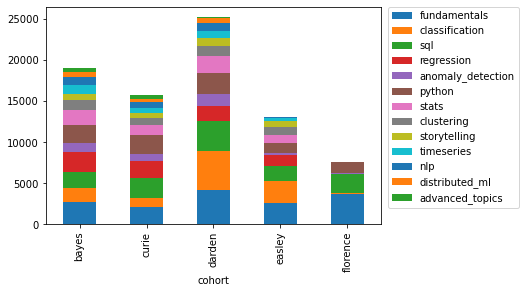

In [101]:
# Plots a barplot of number of entries for all Full Stack Java cohorts
plt.figure(figsize=(20, 16))
q2_ds_combined_lessons.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation = 90)
plt.show()

##### The counts for top 2 cohorts for each set of lessons for Data Science

In [102]:
# prints out the names and numbers of the top 2 cohort for each ds lesson set
for group in q2_ds_lesson_dfs_groupby:
    print(group.nlargest(2))

cohort
darden      4182
florence    3637
Name: fundamentals, dtype: int64
cohort
darden    4715
easley    2716
Name: classification, dtype: int64
cohort
darden    3665
curie     2356
Name: sql, dtype: int64
cohort
bayes    2416
curie    2118
Name: regression, dtype: int64
cohort
darden    1460
bayes     1068
Name: anomaly_detection, dtype: int64
cohort
darden    2500
curie     2286
Name: python, dtype: int64
cohort
darden    2126
bayes     1783
Name: stats, dtype: int64
cohort
bayes     1254
darden    1173
Name: clustering, dtype: int64
cohort
darden    904
bayes     775
Name: storytelling, dtype: int64
cohort
bayes     1117
darden     939
Name: timeseries, dtype: int64
cohort
bayes     981
darden    979
Name: nlp, dtype: int64
cohort
darden    545
bayes     493
Name: distributed_ml, dtype: int64
cohort
bayes    541
curie    397
Name: advanced_topics, dtype: int64


In [103]:
# list of names of fsj series groupbys
q2_fsj_lesson_dfs_groupby = [q2_fsj_javascript_i_groupby, q2_fsj_java_iii_groupby, q2_fsj_html_css_groupby
                     , q2_fsj_java_ii_groupby, q2_fsj_jquery_groupby, q2_fsj_mysql_groupby, 
                     q2_fsj_spring_groupby, q2_fsj_slides_groupby, q2_fsj_web_design_groupby]

In [104]:
q2_fsj_combined_lessons = pd.concat(q2_fsj_lesson_dfs_groupby, axis=1)
q2_fsj_combined_lessons

,javascript_i,fsj_java_iii,html_css,java_ii,jquery,mysql,spring,slides,web_design
cohort,,,,,,,,,
andromeda,4833,1612,2686,3109,1975,2650.0,1989,38.0,53.0
apex,5449,2328,3428,4851,2249,3446.0,2193,51.0,135.0
bash,3443,1251,1734,2423,1339,1941.0,1430,36.0,15.0
betelgeuse,6555,1911,3141,4111,2882,2747.0,1632,8.0,200.0
ceres,7989,2496,5577,5429,3355,3871.0,2206,27.0,233.0
deimos,4846,2074,3748,4113,1953,3620.0,1991,48.0,87.0
europa,4816,1934,3781,3949,2312,3441.0,1719,16.0,227.0
fortuna,6587,2677,3901,5391,2684,4246.0,2545,177.0,154.0
ganymede,5801,2425,3410,5077,2348,3598.0,1801,205.0,120.0


<Figure size 1440x1152 with 0 Axes>

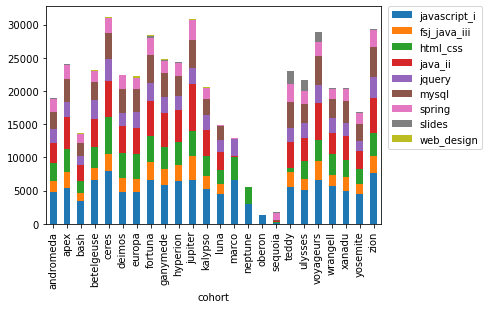

In [105]:
# Plots a barplot of number of entries for all Full Stack Java cohorts
plt.figure(figsize=(20, 16))
q2_fsj_combined_lessons.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation = 90)
plt.show()

##### The counts for top 2 cohorts for each set of lessons for Full Stack Java

In [106]:
# prints out the names and numbers of the top 2 cohort for each fsj lesson set
for group in q2_fsj_lesson_dfs_groupby:
    print(group.nlargest(2))

cohort
ceres    7989
zion     7617
Name: javascript_i, dtype: int64
cohort
jupiter      3590
voyageurs    2927
Name: fsj_java_iii, dtype: int64
cohort
ceres      5577
fortuna    3901
Name: html_css, dtype: int64
cohort
jupiter      7046
voyageurs    5570
Name: java_ii, dtype: int64
cohort
ceres    3355
zion     3277
Name: jquery, dtype: int64
cohort
zion         4418
voyageurs    4338
Name: mysql, dtype: int64
cohort
jupiter    2927
teddy      2713
Name: spring, dtype: int64
cohort
teddy      1901
ulysses    1625
Name: slides, dtype: int64
cohort
ceres     233
europa    227
Name: web_design, dtype: int64


##### Percentage of top set of lessons per Full Stack Javascript cohort over next highest

In [107]:
# percentage higher of the max value compared to the second highest
q2_ds_fundamentals_percentage = round(((q2_ds_fundamentals_groupby.sort_values(ascending=False)[0]/q2_ds_fundamentals_groupby.sort_values(ascending=False)[1])-1)*100, 2)
q2_ds_fundamentals_percentage

14.98

In [108]:
# percentage higher of the max value compared to the second highest
q2_ds_classification_percentage = round(((q2_ds_classification_groupby.sort_values(ascending=False)[0]/q2_ds_classification_groupby.sort_values(ascending=False)[1])-1)*100, 2)
q2_ds_classification_percentage

73.6

In [109]:
# percentage higher of the max value compared to the second highest
q2_ds_sql_percentage = round(((q2_ds_sql_groupby.sort_values(ascending=False)[0]/q2_ds_sql_groupby.sort_values(ascending=False)[1])-1)*100, 2)
q2_ds_sql_percentage

55.56

In [110]:
# percentage higher of the max value compared to the second highest
q2_ds_regression_percentage = round(((q2_ds_regression_groupby.sort_values(ascending=False)[0]/q2_ds_regression_groupby.sort_values(ascending=False)[1])-1)*100, 2)
q2_ds_regression_percentage

14.07

In [111]:
# percentage higher of the max value compared to the second highest
q2_ds_anomaly_detection_percentage = round(((q2_ds_anomaly_detection_groupby.sort_values(ascending=False)[0]/q2_ds_anomaly_detection_groupby.sort_values(ascending=False)[1])-1)*100, 2)
q2_ds_anomaly_detection_percentage

36.7

In [112]:
# percentage higher of the max value compared to the second highest
q2_ds_python_percentage = round(((q2_ds_python_groupby.sort_values(ascending=False)[0]/q2_ds_python_groupby.sort_values(ascending=False)[1])-1)*100, 2)
q2_ds_python_percentage

9.36

In [113]:
# percentage higher of the max value compared to the second highest
q2_ds_stats_percentage = round(((q2_ds_stats_groupby.sort_values(ascending=False)[0]/q2_ds_stats_groupby.sort_values(ascending=False)[1])-1)*100, 2)
q2_ds_stats_percentage

19.24

In [114]:
# percentage higher of the max value compared to the second highest
q2_ds_clustering_percentage = round(((q2_ds_clustering_groupby.sort_values(ascending=False)[0]/q2_ds_clustering_groupby.sort_values(ascending=False)[1])-1)*100, 2)
q2_ds_clustering_percentage

6.91

In [115]:
# percentage higher of the max value compared to the second highest
q2_ds_storytelling_percentage = round(((q2_ds_storytelling_groupby.sort_values(ascending=False)[0]/q2_ds_storytelling_groupby.sort_values(ascending=False)[1])-1)*100, 2)
q2_ds_storytelling_percentage

16.65

In [116]:
# percentage higher of the max value compared to the second highest
q2_ds_timeseries_percentage = round(((q2_ds_timeseries_groupby.sort_values(ascending=False)[0]/q2_ds_timeseries_groupby.sort_values(ascending=False)[1])-1)*100, 2)
q2_ds_timeseries_percentage

18.96

In [117]:
# percentage higher of the max value compared to the second highest
q2_ds_nlp_percentage = round(((q2_ds_nlp_groupby.sort_values(ascending=False)[0]/q2_ds_nlp_groupby.sort_values(ascending=False)[1])-1)*100, 2)
q2_ds_nlp_percentage

0.2

In [118]:
# percentage higher of the max value compared to the second highest
q2_ds_distributed_ml_percentage = round(((q2_ds_distributed_ml_groupby.sort_values(ascending=False)[0]/q2_ds_distributed_ml_groupby.sort_values(ascending=False)[1])-1)*100, 2)
q2_ds_distributed_ml_percentage

10.55

In [119]:
# percentage higher of the max value compared to the second highest
q2_ds_advanced_topics_percentage = round(((q2_ds_advanced_topics_groupby.sort_values(ascending=False)[0]/q2_ds_advanced_topics_groupby.sort_values(ascending=False)[1])-1)*100, 2)
q2_ds_advanced_topics_percentage

36.27

##### Percentage of top set of lessons per Full Stack Javascript cohort over next highest

In [120]:
# Percentage higher of the max value compared to the second highest
q2_fsj_javascript_i_percentage = round(((q2_fsj_javascript_i_groupby.sort_values(ascending=False)[0]/q2_fsj_javascript_i_groupby.sort_values(ascending=False)[1])-1)*100, 2)
q2_fsj_javascript_i_percentage

4.88

In [121]:
# Percentage higher of the max value compared to the second highest
q2_fsj_java_iii_percentage = round(((q2_fsj_java_iii_groupby.sort_values(ascending=False)[0]/q2_fsj_java_iii_groupby.sort_values(ascending=False)[1])-1)*100, 2)
q2_fsj_java_iii_percentage

22.65

In [122]:
# Percentage higher of the max value compared to the second highest
q2_fsj_html_css_percentage = round(((q2_fsj_html_css_groupby.sort_values(ascending=False)[0]/q2_fsj_html_css_groupby.sort_values(ascending=False)[1])-1)*100, 2)
q2_fsj_html_css_percentage

42.96

In [123]:
# Percentage higher of the max value compared to the second highest
q2_fsj_java_ii_percentage = round(((q2_fsj_java_ii_groupby.sort_values(ascending=False)[0]/q2_fsj_java_ii_groupby.sort_values(ascending=False)[1])-1)*100, 2)
q2_fsj_java_ii_percentage

26.5

In [124]:
# Percentage higher of the max value compared to the second highest
q2_fsj_jquery_percentage = round(((q2_fsj_jquery_groupby.sort_values(ascending=False)[0]/q2_fsj_jquery_groupby.sort_values(ascending=False)[1])-1)*100, 2)
q2_fsj_jquery_percentage

2.38

In [125]:
# Percentage higher of the max value compared to the second highest
q2_fsj_mysql_percentage = round(((q2_fsj_mysql_groupby.sort_values(ascending=False)[0]/q2_fsj_mysql_groupby.sort_values(ascending=False)[1])-1)*100, 2)
q2_fsj_mysql_percentage

1.84

In [126]:
# Percentage higher of the max value compared to the second highest
q2_fsj_spring_percentage = round(((q2_fsj_spring_groupby.sort_values(ascending=False)[0]/q2_fsj_spring_groupby.sort_values(ascending=False)[1])-1)*100, 2)
q2_fsj_spring_percentage

7.89

In [127]:
# Percentage higher of the max value compared to the second highest
q2_fsj_slides_percentage = round(((q2_fsj_slides_groupby.sort_values(ascending=False)[0]/q2_fsj_slides_groupby.sort_values(ascending=False)[1])-1)*100, 2)
q2_fsj_slides_percentage

16.98

In [128]:
# Percentage higher of the max value compared to the second highest
q2_fsj_web_design_percentage = round(((q2_fsj_web_design_groupby.sort_values(ascending=False)[0]/q2_fsj_web_design_groupby.sort_values(ascending=False)[1])-1)*100, 2)
q2_fsj_web_design_percentage

2.64

#### Key Takeaways

The Data Science cohorts with the highest lesson referrals compared to the next highest cohort are as follows:
- Darden
    - 73.60% for Classification
    - 55.56% for SQL
    - 36.70% for Anomaly Detection
- Bayes
    - 36.27% for Advanced Topics

The Full Stack Java cohorts with the highest lesson referrals compared to the next highest cohort are as follows:
- Ceres
    - 42.96% for HTML-CSS
- Jupiter
    - 26.5% for Java II

In [129]:
# Assigns a variable to a list of the differences in percentages between the top 2 cohorts for each lesson
q2_ds_lesson_percentages = [q2_ds_fundamentals_percentage, q2_ds_classification_percentage, 
                            q2_ds_sql_percentage, q2_ds_regression_percentage, q2_ds_anomaly_detection_percentage,
                            q2_ds_python_percentage, q2_ds_stats_percentage, q2_ds_clustering_percentage, 
                            q2_ds_storytelling_percentage, q2_ds_timeseries_percentage, q2_ds_nlp_percentage, 
                            q2_ds_distributed_ml_percentage, q2_ds_advanced_topics_percentage]

In [130]:
# Assigns a variable to a list of the differences in percentages between the top 2 cohorts for each lesson
q2_fsj_lesson_percentages = [q2_fsj_javascript_i_percentage, q2_fsj_java_iii_percentage, 
                             q2_fsj_html_css_percentage, q2_fsj_java_ii_percentage, q2_fsj_jquery_percentage,
                             q2_fsj_mysql_percentage, q2_fsj_spring_percentage, q2_fsj_slides_percentage, 
                             q2_fsj_web_design_percentage]

In [131]:
# Assigns a variable to a series converted from a list of the differences in 
# percentages between the top 2 cohorts for each lesson
ds_upper_bound_and_max = pd.Series(q2_ds_lesson_percentages)

# assigns a name to the series
ds_upper_bound_and_max.name = 'data_science_cohorts'

In [132]:
# Assigns a variable to a series converted from a list of the differences in 
# percentages between the top 2 cohorts for each lesson
fsj_upper_bound_and_max = pd.Series(q2_fsj_lesson_percentages)

# assigns a name to the series
fsj_upper_bound_and_max.name = 'full_stack_java_cohorts'

In [133]:
# Gets the upper bound and difference from max of a series based on the InterQuartile Range
# and a multiplier. Default multiplier is 1.5
q2_ds_iqr = e.get_upper_bound_and_difference(ds_upper_bound_and_max)

data_science_cohorts's Upper bound is 74.85, and difference from max is -1.25


In [134]:
# Gets the upper bound and difference from max of a series based on the InterQuartile Range
# and a multiplier. Default multiplier is 1.5
q2_fsj_iqr = e.get_upper_bound_and_difference(fsj_upper_bound_and_max)

full_stack_java_cohorts's Upper bound is 52.66, and difference from max is -9.7


#### Key Takeaways

- Using the Interquartile Range Rule the Darden Data Science cohort falls just within the upper bound of 74.85% compared to their 73.60%
- Using the Interquartile Range Rule the Ceres Full Stack Java cohort also falls within the upper bound of 52.66% compared to their 42.96%

### Second Interpretation
 - Using IQR on the whole set instead of top two cohorts

In [135]:
# Gets the upper bound and its difference from the max of a series based on the 
# InterQuartile Range and a multiplier. Default multiplier is 1.5
for lesson in q2_ds_lesson_dfs_groupby:
    e.get_upper_bound_and_difference(lesson)

fundamentals's Upper bound is 5275.0, and difference from max is -1093.0
classification's Upper bound is 5036.5, and difference from max is -321.5
sql's Upper bound is 2963.5, and difference from max is 701.5
regression's Upper bound is 3403.5, and difference from max is -987.5
anomaly_detection's Upper bound is 2287.5, and difference from max is -827.5
python's Upper bound is 3667.5, and difference from max is -1167.5
stats's Upper bound is 2945.5, and difference from max is -819.5
clustering's Upper bound is 1759.5, and difference from max is -505.5
storytelling's Upper bound is 913.0, and difference from max is -9.0
timeseries's Upper bound is 1690.5, and difference from max is -573.5
nlp's Upper bound is 2396.5, and difference from max is -1415.5
distributed_ml's Upper bound is 1220.5, and difference from max is -675.5
advanced_topics's Upper bound is 953.5, and difference from max is -412.5


In [136]:
# Gets the upper bound and its difference from the max of a series based on the 
# InterQuartile Range and a multiplier. Default multiplier is 1.5
for group in q2_fsj_lesson_dfs_groupby:
    e.get_upper_bound_and_difference(group)

javascript_i's Upper bound is 9295.12, and difference from max is -1306.12
fsj_java_iii's Upper bound is 3731.5, and difference from max is -141.5
html_css's Upper bound is 5053.62, and difference from max is 523.38
java_ii's Upper bound is 8058.62, and difference from max is -1012.62
jquery's Upper bound is 3290.25, and difference from max is 64.75
mysql's Upper bound is 5603.25, and difference from max is -1185.25
spring's Upper bound is 3163.12, and difference from max is -236.12
slides's Upper bound is 389.38, and difference from max is 1511.62
web_design's Upper bound is 303.75, and difference from max is -70.75


In [137]:
# Average of the sum of all values excluding the max
q2_ds_sql_under_max_avg = (q2_ds_sql_groupby.sum()-q2_ds_sql_groupby.max())/(len(q2_fsj_html_css_groupby)-1)

In [138]:
# Max value for a cohort for these lessons
q2_ds_sql_max = q2_ds_sql_groupby.max()

In [139]:
# Returns percentage difference of the max value compared to the average of the rest
q2_ds_sql_percentage_difference = round((q2_ds_sql_max/q2_ds_sql_under_max_avg*100), 2)
q2_ds_sql_percentage_difference

996.28

#### Key Takeaways

It shows the following Data Science lesson was referred to above the 1.5 IQR Upper Bound:
- SQL at 701.5 above the Upper bound with a 996.28% difference compared to average of rest of cohorts.
- While at 55.56% this Darden cohort may have been lower percentage-wise then its next immediate cohort, Curie, it's a more significant difference in comparison to all other cohorts referring to their respective lessons

It shows the following Full Stack Java lessons were referred to above the 1.5 IQR Upper Bound:
- HTML-CSS for Ceres, at 523.38, a 207.34% difference compared to average of rest of cohorts.
- JQuery for Ceres, at 64.75, a 170.93% difference compared to average of rest of cohorts.
- Slides for Teddy, at 1511.62, a 871.26% difference compared to average of rest of cohorts.
- While at 42.96% the Ceres cohort may have been under the 1.5 IQR percentage-wise when comparing the next highest cohort to the top cohort for each lesson, the Teddy cohort comes out on top when comparing the average of the rest of the cohorts when referring to the "Slides" lessons.

In [141]:
# Average of the sum of all values excluding the max
q2_fsj_html_css_under_max_avg = (q2_fsj_html_css_groupby.sum()-q2_fsj_html_css_groupby.max())/(len(q2_fsj_html_css_groupby)-1)

In [142]:
# Max value for a cohort for these lessons
q2_fsj_html_css_max = q2_fsj_html_css_groupby.max()

Final percentage difference for the max vs the average of the rest for the "HTML-CSS" lessons

In [143]:
# Returns percentage difference of the max value compared to the average of the rest
q2_fsj_html_css_percentage_difference = round((q2_fsj_html_css_max/q2_fsj_html_css_under_max_avg*100), 2)
q2_fsj_html_css_percentage_difference

207.34

In [144]:
# Average of the sum of all values excluding the max
q2_fsj_jquery_under_max_avg = (q2_fsj_jquery_groupby.sum()-q2_fsj_jquery_groupby.max())/(len(q2_fsj_jquery_groupby)-1)

In [145]:
# max value for a cohort oor these lessons
q2_fsj_jquery_max = q2_fsj_jquery_groupby.max()

Final percentage difference for the max vs the average of the rest for the "JQuery" lessons

In [146]:
# Returns percentage difference of the max value compared to the average of the rest
q2_fsj_jquery_difference = round((q2_fsj_jquery_max/q2_fsj_jquery_under_max_avg*100), 2)
q2_fsj_jquery_difference

170.93

In [147]:
# Average of the sum of all values excluding the max
q2_fsj_slides_under_max_avg = (q2_fsj_slides_groupby.sum()-q2_fsj_slides_groupby.max())/(len(q2_fsj_slides_groupby)-1)

In [148]:
# Max value for a cohort for these lessons
q2_fsj_slides_max = q2_fsj_slides_groupby.max()

Final percentage difference for the max vs the average of the rest for the "Slides" lessons

In [149]:
# Returns percentage difference of the max value compared to the average of the rest
q2_fsj_slides_difference = round((q2_fsj_slides_max/q2_fsj_slides_under_max_avg*100), 2)
q2_fsj_slides_difference

871.26

# Q2. Summary of Takeaways
- Question 2. *"Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?"*
- If applying the Interquartile Range (IQR) Rule to the difference in the percentages between the top cohort and it's runner-up for each set of lessons, none of them fall above the upper bound of the IQR.
- However when using the IQR to for the top cohort in comparison to the rest of the cohorts as a whole then for the **Teddy** cohort from the **Full Stack Java** program beats out the rest with the **"Slides"** lessons, and the **Darden** cohort from the **Data Science** program beats out the rest with the **"SQL"** lessons.
